In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

df_path = "Kaggle_data.xlsx"

In [3]:
df = pd.read_excel("Kaggle\Kaggle_data.xlsx")
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [4]:
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [5]:
education_unemployed_sum  = df[["Education","I am unemployed"]].groupby("Education").sum()
education_unemployed_count = df[["Education","I am unemployed"]].groupby("Education").count()
education_unemployed_percentage = education_unemployed_sum / education_unemployed_count
education_unemployed_percentage.sort_values(by="I am unemployed", ascending = False,inplace = True)

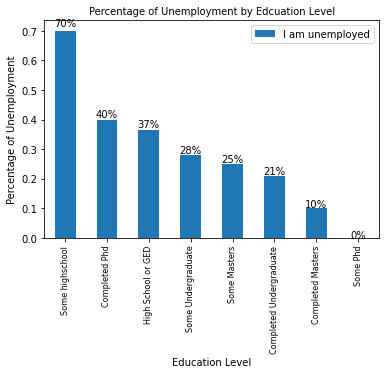

In [6]:
ed = education_unemployed_percentage.plot(kind = "bar")
plt.xlabel('Education Level', fontsize=10)
plt.ylabel('Percentage of Unemployment', fontsize=10)
plt.title('Percentage of Unemployment by Edcuation Level', fontsize=10)
plt.xticks(fontsize=8)
for p in ed.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ed.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [7]:
age_unemployed_sum = df[["Age","I am unemployed"]].groupby("Age").sum()
age_unemployed_count = df[["Age","I am unemployed"]].groupby("Age").count()
age_unemployed_percentage = age_unemployed_sum / age_unemployed_count
age_unemployed_percentage.sort_values(by="I am unemployed", ascending = False,inplace = True)

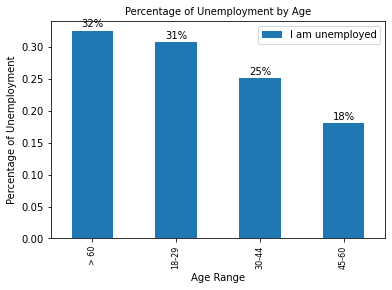

In [8]:
age = age_unemployed_percentage.plot(kind = "bar")
plt.xlabel('Age Range', fontsize=10)
plt.ylabel('Percentage of Unemployment', fontsize=10)
plt.title('Percentage of Unemployment by Age', fontsize=10)
plt.xticks(fontsize=8)
for p in age.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    age.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [9]:
gender_unemployed_sum = df[["Gender","I am unemployed"]].groupby("Gender").sum()
gender_unemployed_count = df[["Gender","I am unemployed"]].groupby("Gender").count()
gender_unemployed_percentage = gender_unemployed_sum / gender_unemployed_count
gender_unemployed_percentage.sort_values(by="I am unemployed", ascending = False,inplace = True)

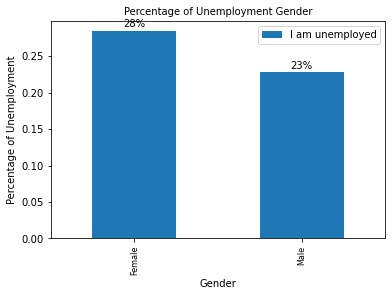

In [13]:
gender = gender_unemployed_percentage.plot(kind = "bar")
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Percentage of Unemployment', fontsize=10)
plt.title('Percentage of Unemployment Gender', fontsize=10)
plt.xticks(fontsize=8)
for p in gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    gender.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [49]:
income_unemployed_sum = df[["Household Income","I am unemployed"]].groupby("Household Income").sum()
income_unemployed_count = df[["Household Income","I am unemployed"]].groupby("Household Income").count()
income_unemployed_count

,I am unemployed
Household Income,
"$0-$9,999",27
"$10,000-$24,999",35
"$100,000-$124,999",24
"$125,000-$149,999",16
"$150,000-$174,999",14
"$175,000-$199,999",2
"$200,000+",20
"$25,000-$49,999",68
"$50,000-$74,999",57


In [ ]:
income_unemployed_percentage = income_unemployed_sum / income_unemployed_count
income_unemployed_percentage.reset_index(inplace = True)
income_unemployed_percentage

In [45]:
df_mapping = pd.DataFrame({
    'Household Income': ["$0-$9,999", "$10,000-$24,999", "$25,000-$49,999", "$50,000-$74,999", "$75,000-$99,999", "$100,000-$124,999", "$125,000-$149,999", "$150,000-$174,999", "$175,000-$199,999", "$200,000+", "Prefer not to answer"]
})

sort_mapping = df_mapping.reset_index().set_index("Household Income")
sort_mapping

,index
Household Income,
"$0-$9,999",0
"$10,000-$24,999",1
"$25,000-$49,999",2
"$50,000-$74,999",3
"$75,000-$99,999",4
"$100,000-$124,999",5
"$125,000-$149,999",6
"$150,000-$174,999",7
"$175,000-$199,999",8


In [47]:
income_unemployed_percentage["sort"] = income_unemployed_percentage["Household Income"].map(sort_mapping['index'])
income_unemployed_percentage.sort_values('sort', inplace = True)
income_unemployed_percentage.drop('sort', axis = 1, inplace = True)
income_unemployed_percentage

,Household Income,I am unemployed
0,"$0-$9,999",0.629630
1,"$10,000-$24,999",0.257143
7,"$25,000-$49,999",0.220588
8,"$50,000-$74,999",0.298246
9,"$75,000-$99,999",0.212121
2,"$100,000-$124,999",0.083333
3,"$125,000-$149,999",0.000000
4,"$150,000-$174,999",0.214286
5,"$175,000-$199,999",0.500000
6,"$200,000+",0.050000


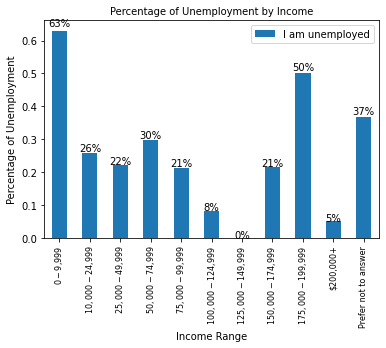

In [48]:
income = income_unemployed_percentage.plot(kind = "bar")
plt.xlabel('Income Range', fontsize=10)
plt.ylabel('Percentage of Unemployment', fontsize=10)
plt.title('Percentage of Unemployment by Income', fontsize=10)
plt.xticks(ticks = range(len(income_unemployed_percentage)), labels = income_unemployed_percentage['Household Income'], fontsize=8)
for p in income.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    income.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')